***K-Mean Clustering Algorithm***

**Dataset Used:**

The dataset contains of weight and height of 500 individuals.

**Algorithm:**

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined
distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It
tries to make the intra-cluster data points as similar as possible while also keeping the clusters as
different (far) as possible. It assigns data points to a cluster such that the sum of the squared
distance between the data points and the cluster’s centroid (arithmetic mean of all the data points
that belong to that cluster) is at the minimum. The less variation we have within clusters, the more
homogeneous (similar) the data points are within the same cluster.
Step 1: Specify number of clusters K.
Step 2: Initialize centroids by first shuffling the dataset and then randomly selecting K data points
for the centroids without replacement.
Step 3: Keep iterating until there is no change to the centroids. i.e assignment of data points to
clusters isn’t changing.
• Compute the sum of the squared distance between data points and all centroids.
• Assign each data point to the closest cluster (centroid).
• Compute the centroids for the clusters by taking the average of the all data points that belong
to each cluster.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Clustering-gmm.csv')
data = data.sample(frac=1)

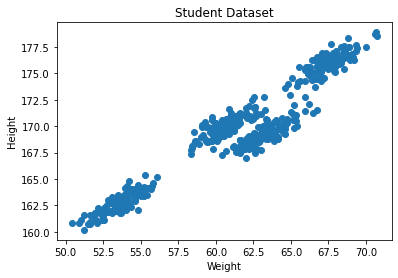

In [ ]:
plt.scatter(data['Weight'],data['Height'])
plt.title('Student Dataset')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [ ]:
dataset = np.array(data)
X = dataset[:,0:2]

In [ ]:
# Using elbow method to find the optimal number of cluster
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

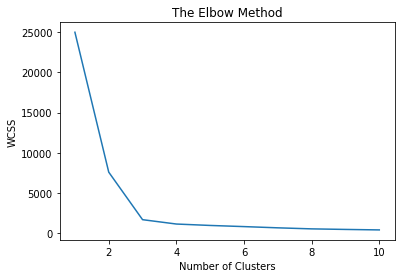

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#fitting k-means to dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)

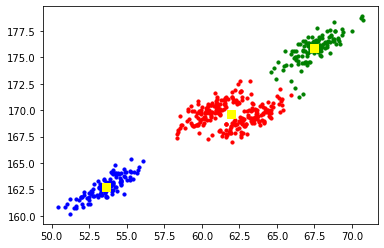

In [ ]:
plt.scatter(X[y_kmeans == 0, 0],X[y_kmeans == 0, 1], s=10 , c='red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0],X[y_kmeans == 1, 1], s=10 , c='blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0],X[y_kmeans == 2, 1], s=10 , c='green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,
c='yellow',label='centroid', marker = 's')

No handles with labels found to put in legend.


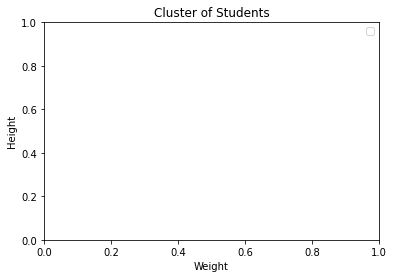

In [ ]:
plt.title('Cluster of Students')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()